In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import folium


In [107]:
data = pd.read_csv("final.csv")
data.head()

,index,House Direction,Balcony Direction,Bedrooms,Toilets,Legits,Floors,Facade,Entrance,District,Ward,Street,Area,Price
0,0,Nam,Bắc,3,2,None,None,None,None,Tây Hồ,Phường Phú Thượng,None,100.0,4000.000
1,1,Nam,Bắc,2,2,Sổ đỏ/ Sổ hồng,None,None,None,Tây Hồ,Phường Phú Thượng,Đường Võ Chí Công,80.74,3496.042
2,2,None,None,3,3,Sổ đỏ/ Sổ hồng,None,None,None,Cầu Giấy,Phường Yên Hòa,Đường Dương Đình Nghệ,131.0,5900.000
3,3,None,None,5,None,Sổ đỏ/ Sổ hồng.,5,None,None,Long Biên,Phường Bồ Đề,Đường Bồ Đề,52.0,6750.000
4,4,None,None,3,2,Sổ đỏ/ Sổ hồng,None,None,None,Nam Từ Liêm,Thị trấn Cầu Diễn,Đường Hàm Nghi,119.0,5800.000


In [108]:
import folium

world_map = folium.Map()

In [109]:
for i in data.columns:
    print(i)

index
House Direction
Balcony Direction
Bedrooms
Toilets
Legits
Floors
Facade
Entrance
District
Ward
Street
Area
Price


In [110]:
(data["Price"] == "None").sum()

0

In [111]:
pd.DataFrame(data["Price"].describe())

,Price
count,5.004700e+04
mean,1.075670e+05
std,1.208856e+06
min,0.000000e+00
25%,4.500000e+03
50%,1.800000e+04
75%,7.000000e+04
max,2.300000e+08


In [112]:
price = data["Price"]
price = price[price <2.3e8]

<AxesSubplot:>

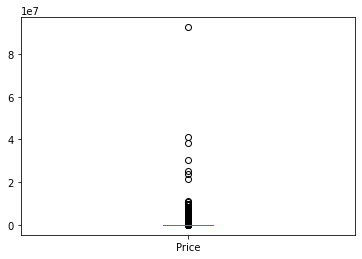

In [113]:
price.plot(kind="box")

In [114]:
IQR = data.Price.quantile(0.75) - data.Price.quantile(0.25)
Lower_fence = data.Price.quantile(0.25) - (IQR * 3)
Upper_fence = data.Price.quantile(0.75) + (IQR * 3)

In [115]:
price = price[(price >= Lower_fence) & (price <= Upper_fence)]
price

0         4000.000
1         3496.042
2         5900.000
3         6750.000
4         5800.000
           ...    
50042    48000.000
50043    65000.000
50044    43000.000
50045    76000.000
50046    68000.000
Name: Price, Length: 46418, dtype: float64

In [116]:
price.describe()

count     46418.000000
mean      40146.424455
std       54655.717428
min           0.000000
25%        4200.000000
50%       13500.000000
75%       54675.000000
max      266000.000000
Name: Price, dtype: float64

<AxesSubplot:>

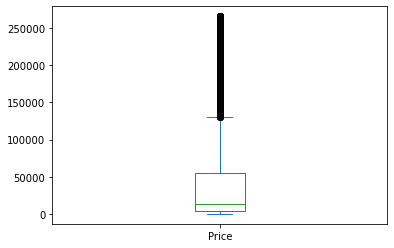

In [117]:
price.plot(kind="box")

{'bodies': [<matplotlib.collections.PolyCollection at 0x2dc2e4350f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2dc2e435060>,
 'cmins': <matplotlib.collections.LineCollection at 0x2dc2e435690>,
 'cbars': <matplotlib.collections.LineCollection at 0x2dc2e435a50>}

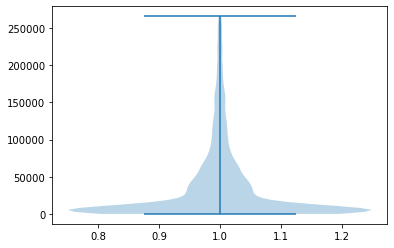

In [118]:
plt.violinplot(price)

<AxesSubplot:title={'center':'Price (million vnd)'}, ylabel='Frequency'>

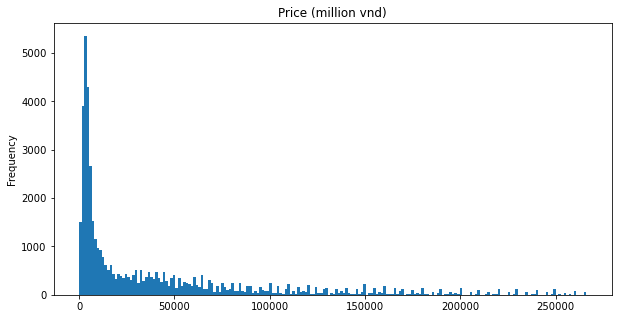

In [119]:
price.plot(kind="hist", bins=200, figsize=(10,5), title="Price (million vnd)")

In [120]:
d = lambda x: " ".join(map(lambda t: t.capitalize(), " ".join(map(lambda y: y.strip(), x.split("-"))).split()))
n = lambda x: x if x == "None" or float(x) <= 10 else "10+"

In [121]:
data['House Direction'] = data['House Direction'].apply(d)

In [122]:
data['Balcony Direction'] = data['Balcony Direction'].apply(d)

In [123]:
for feature in ['Bedrooms', 'Toilets', 'Floors']:
    data[feature] = data[feature].apply(n)

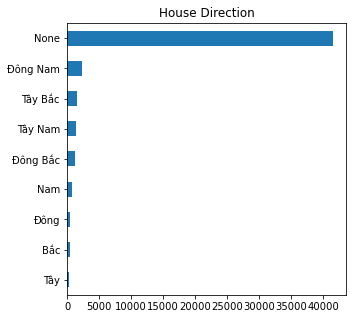

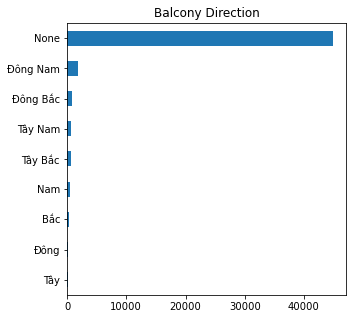

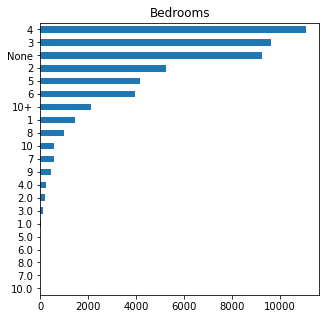

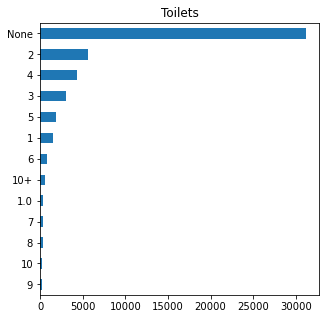

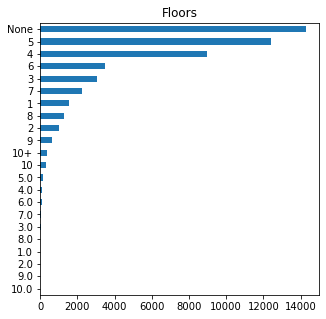

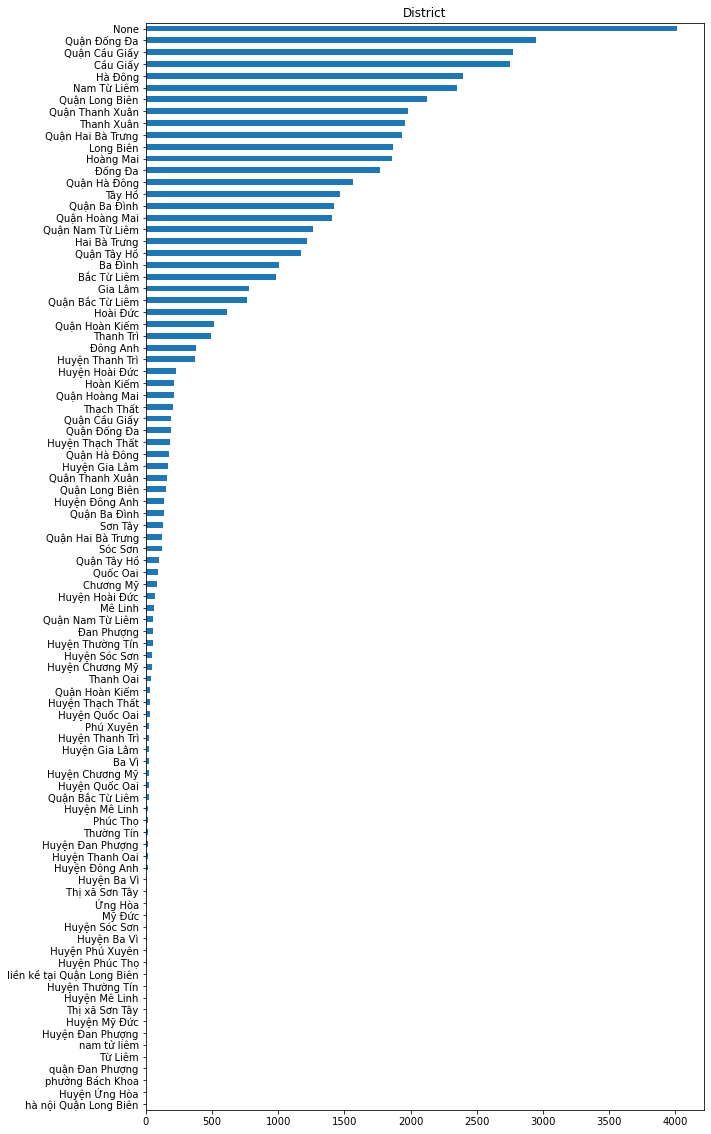

In [129]:
features = ['House Direction', 'Balcony Direction', 'Bedrooms', 'Toilets', 'Floors','District']

for feature in features:
    data[feature].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(5 if feature != "District" else 10,5 if feature != "District" else 20), title=feature)
    plt.show()